In [72]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [73]:
path_to_file = "LaptopSalesPerDay.csv"
source_df = pd.read_csv(path_to_file, delimiter=';', engine='python', decimal=',')
source_df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight,Price_euros,Total Sales per Day (euros)
0,Asus,ROG G701VO,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58,3975.00,19875.00
1,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,5499.00,16497.00
2,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,3072.89,15364.45
3,Lenovo,Thinkpad P51,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,32,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.50,4899.00,14697.00
4,Lenovo,Thinkpad P51,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,16,512GB SSD,Nvidia Quadro M2200M,Windows 10,2.50,2449.00,12245.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Asus,Chromebook C202SA,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.20,287.90,287.90
1299,Mediacom,Smartbook 142,Notebook,14.0,IPS Panel Full HD 1920x1200,Intel Atom Z8350 1.92GHz,4,32GB HDD,Intel HD Graphics 400,Windows 10,1.40,265.00,265.00
1300,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,No OS,1.86,258.00,258.00
1301,Mediacom,SmartBook 141,Notebook,14.0,Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,4,32GB SSD,Intel HD Graphics,Windows 10,1.40,249.00,249.00


In [90]:
DATASET_SIZE = 600
# Prepare dataset
# Filter
filtered_df = source_df[["Company","Cpu","Gpu","Price_euros","Total Sales per Day (euros)"]]
# Cut top saled itemsdataset
filtered_df = filtered_df.iloc[:DATASET_SIZE]
# May be changed by one action
gpu_manuf_list = ["Nvidia", "Intel", "AMD"]
for gpu_manuf in gpu_manuf_list:
    filtered_df["Gpu"].replace(to_replace=rf'.*{gpu_manuf}.*$', value=gpu_manuf, regex=True, inplace=True)

cpu_manuf_list = ["Samsung", "Intel", "AMD"]
for cpu_manuf in cpu_manuf_list:
    filtered_df["Cpu"].replace(to_replace=rf'.*{cpu_manuf}.*$', value=cpu_manuf, regex=True, inplace=True)
# Move to numeric values
filtered_df["Sales"] = filtered_df["Total Sales per Day (euros)"]
filtered_df = filtered_df.drop("Total Sales per Day (euros)", axis=1)
filtered_df

,Company,Cpu,Gpu,Price_euros,Sales
0,Asus,Intel,Nvidia,3975.00,19875.00
1,Razer,Intel,Nvidia,5499.00,16497.00
2,Dell,Intel,Nvidia,3072.89,15364.45
3,Lenovo,Intel,Nvidia,4899.00,14697.00
4,Lenovo,Intel,Nvidia,2449.00,12245.00
...,...,...,...,...,...
595,HP,Intel,Intel,1030.99,2061.98
596,Razer,Intel,Intel,1029.00,2058.00
597,Asus,Intel,Nvidia,1026.00,2052.00
598,HP,Intel,Intel,2049.00,2049.00


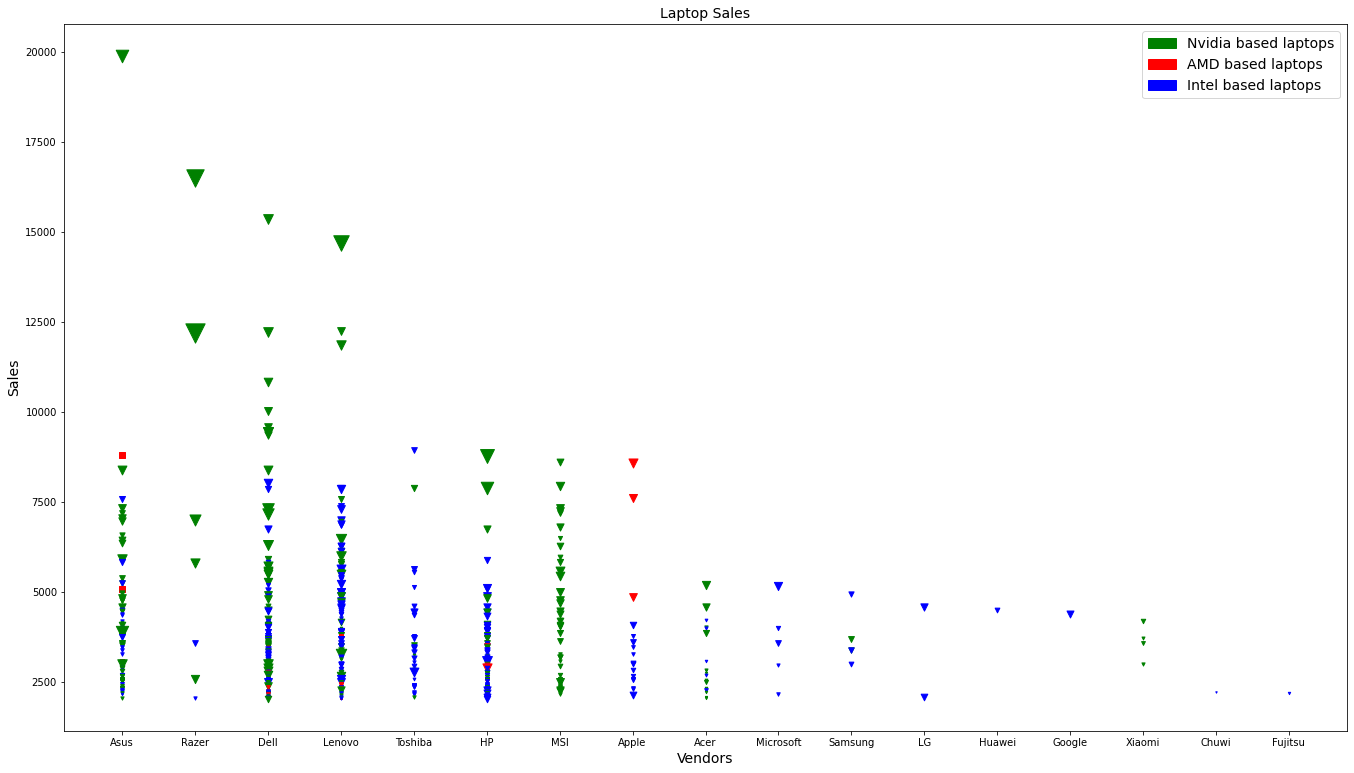

In [103]:


CPUs = []
for elem in filtered_df["Cpu"]:
    CPUs.append(cpu_manuf_list.index(elem))

colormap = np.array(['g','b', 'r'])

GPUs = []
for elem in filtered_df["Gpu"]:
    GPUs.append(gpu_manuf_list.index(elem))

marker_map = np.array(['o','v','s'])

plt.figure(figsize=(23,13))
plt.xlabel('Vendors', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.title('Laptop Sales', fontsize=14)

green_patch = mpatches.Patch(color='green', label='Nvidia based laptops')
red_patch = mpatches.Patch(color='red', label='AMD based laptops')
blue_patch = mpatches.Patch(color='blue', label='Intel based laptops')
plt.legend(handles=[green_patch, red_patch, blue_patch], fontsize=14)
# This is a spike to have different markers
for i, elem in filtered_df.iterrows():
    plt.scatter(elem.Company, elem.Sales, s = elem.Price_euros**2 / 100000, c = colormap[GPUs[i]], marker = marker_map[CPUs[i]])
